# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

In [2]:
df = pd.read_csv('laptop_pricing_dataset_mod1.csv')
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


update the Screen_Size_cm column such that all values are rounded to nearest 2 decimal places by using numpy.round()

In [4]:
df['Screen_Size_cm'] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


# Evaluate the dataset for missing data

In [5]:
missing_data = df.isnull()
missing_data.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print('')

Unnamed: 0
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
Manufacturer
False    238
Name: count, dtype: int64

Category
Category
False    238
Name: count, dtype: int64

Screen
Screen
False    238
Name: count, dtype: int64

GPU
GPU
False    238
Name: count, dtype: int64

OS
OS
False    238
Name: count, dtype: int64

CPU_core
CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

CPU_frequency
CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
Price
False    238
Name: count, dtype: int64



# Replace missing values with mean
Missing values in attributes that have continuous data are best replaced using Mean value. note that values in "Weight_kg" attribute are continuous in nature, and some values are missing.

In [7]:
avg_weight_kg = df['Weight_kg'].astype('float').mean(axis=0)
df['Weight_kg'] = df['Weight_kg'].fillna(avg_weight_kg)

# Replace with the most frequent value:
Missing values in attributes that have categorical data are best replaced using the most frequent value.note that values in "Screen_Size_cm" attribute are categorical in nature, and some values are missing. Therefore, replace the missing values of Screen Size with the most frequent value of the attribute.

In [8]:
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
print(common_screen_size)
df['Screen_Size_cm'] = df['Screen_Size_cm'].fillna(common_screen_size)

39.62


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  238 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       238 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


There is no missing data now.

---



# Fixing the data types

The columns already have the correct data type (float), no conversion needed.

---




# Data Standardization
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds.

1 inch = 2.54 cm

1 kg   = 2.205 pounds

In [10]:
# Data standardization: convert screen size from cm to inch
df['Screen_Size_cm'] = df['Screen_Size_cm']/2.54
df.rename(columns = {'Screen_size_cm':'Screen_size_inch'},inplace=True)

# Data standardization: convert weight from kg to pounds
df['Weight_kg'] = df['Weight_kg']*2.205
df.rename(columns={'Weight_kg':'Weight_pounds'},inplace=True)



---

# Data Normalization

In [11]:
# normalize the "CPU_frequency" attribute
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

In [12]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0,Acer,4,IPS Panel,2,1,5,14.000000,0.551724,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,15.598425,0.689655,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,15.598425,0.931034,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,13.299213,0.551724,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,15.598425,0.620690,8,256,4.21155,837




---

# Binning
create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".

In [13]:
print(df['Price'].min())
print(df['Price'].max())
print(df['Price'].nunique())

527
3810
193


In [14]:
bins = np.linspace(df['Price'].min(),df['Price'].max(),4)
bins

array([ 527.        , 1621.33333333, 2715.66666667, 3810.        ])

In [15]:
group_names = ['Low','Medium','High']

In [16]:
df['Price_binned'] = pd.cut(df['Price'],bins,labels=group_names,include_lowest=True)
df[['Price','Price_binned']].head(10)

,Price,Price_binned
0,978,Low
1,634,Low
2,946,Low
3,1244,Low
4,837,Low
5,1016,Low
6,1117,Low
7,866,Low
8,812,Low
9,1068,Low


In [17]:
df['Price_binned'].value_counts()

,count
Price_binned,
Low,160
Medium,72
High,6


plot the bar graph of these bins.

Text(0.5, 1.0, 'Price bins')

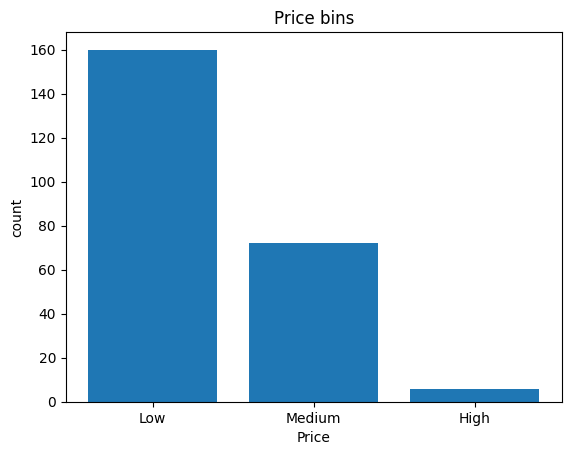

In [18]:
plt.bar(group_names, df["Price_binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")



---
# Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.


In [19]:
dummy_variable_1 = pd.get_dummies(df['Screen'])
dummy_variable_1.head()

,Full HD,IPS Panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False


In [20]:
df.rename(columns={'Full HD':'Screen-Full_HD','IPS Panel':'Screen-IPS_panel'},inplace = True)
df = pd.concat([df,dummy_variable_1],axis=1)
df.drop('Screen',axis=1,inplace=True)

In [21]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price_binned,Full HD,IPS Panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False
